<a href="https://colab.research.google.com/github/irapadole15/Crew-AI--Project/blob/main/Social%20Media%20Sentiment%20Analysis%20Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Pytesseract

In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Importing Required Libraries

In [ ]:
import cv2
import pytesseract
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Step 1: Loading and Balancing Sentiment140 Dataset

In [ ]:
def load_and_balance_dataset():
    df = pd.read_csv("/content/archive (7).zip", encoding='ISO-8859-1', header=None)
    df.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text']

    # Keeping relevant columns
    df = df[['Sentiment', 'Text']]

    # Converting labels
    df['Sentiment'] = df['Sentiment'].map({0: "Negative", 4: "Positive"})

    # Balancing dataset
    min_class_size = df['Sentiment'].value_counts().min()
    balanced_df = df.groupby('Sentiment').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)
    print("\nBalanced Class Distribution:\n", balanced_df['Sentiment'].value_counts())
    return balanced_df

# Load and balance the dataset
dataset = load_and_balance_dataset()


Balanced Class Distribution:
 Sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64


Exploratory Data Analysis

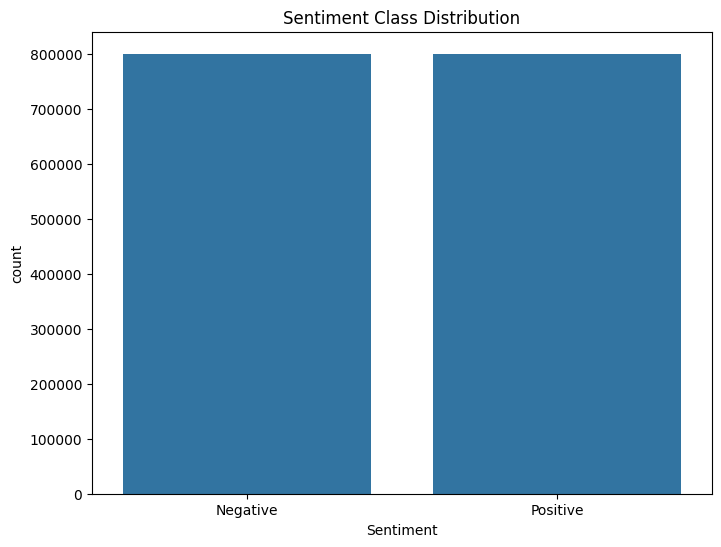

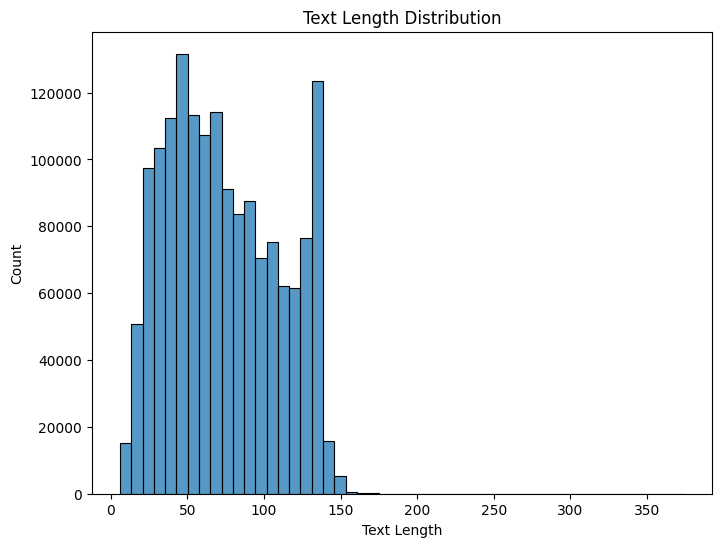

In [ ]:
def perform_eda(dataset):
    # Class Distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sentiment', data=dataset)
    plt.title('Sentiment Class Distribution')
    plt.show()

    # Text Length Distribution
    dataset['Text Length'] = dataset['Text'].apply(len)
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset['Text Length'], bins=50)
    plt.title('Text Length Distribution')
    plt.show()

perform_eda(dataset)

Training Model


Model Accuracy: 0.77179375

Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.82      0.78    159494
    Positive       0.80      0.72      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



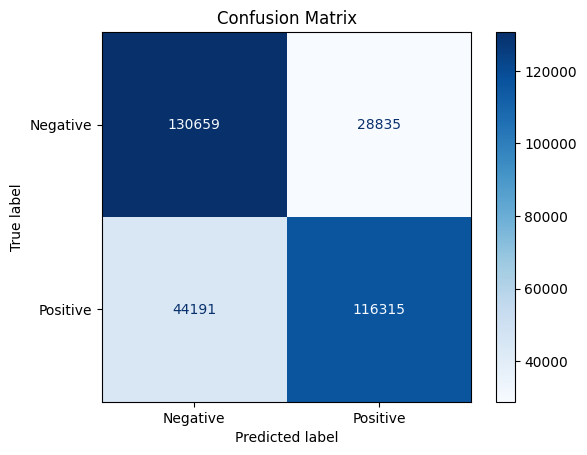

In [ ]:
# Step 2: Train Sentiment Analysis Model
X_train, X_test, y_train, y_test = train_test_split(dataset['Text'], dataset['Sentiment'], test_size=0.2, random_state=42)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

def evaluate_model():

    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print("\nModel Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix')
    plt.show()
evaluate_model()


Extracting Text and Predicting Results


Upload an image (Y/N)? Y

Please upload an image file...


Saving major_img1.jpeg to major_img1.jpeg


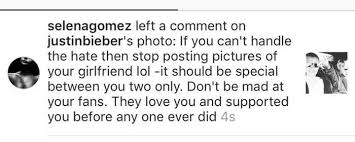


Extracted Text:
selenagomez left a comment on
justinbieber's photo: If you can't handle
a the hate then stop posting pictures of

 

your girlfriend lol -it should be special
between you two only. Don't be mad at |
your fans. They love you and supported
you before any one ever did 4

Classified Sentiment: Negative


Upload an image (Y/N)? Y

Please upload an image file...


Saving _129017565_musk-1.jpg.webp to _129017565_musk-1.jpg.webp


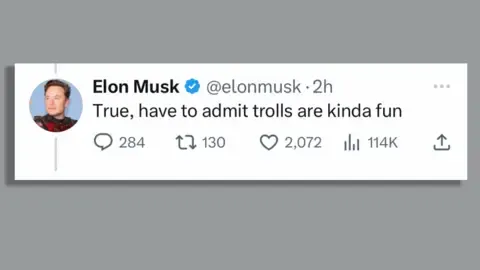


Extracted Text:
Elon Musk @ @elonmusk - 2h
True, have to admit trolls are kinda fun

O24 2130 02072 IntakK Of

Classified Sentiment: Positive


Upload an image (Y/N)? Y

Please upload an image file...


Saving Screenshot 2025-05-08 212137.png to Screenshot 2025-05-08 212137.png


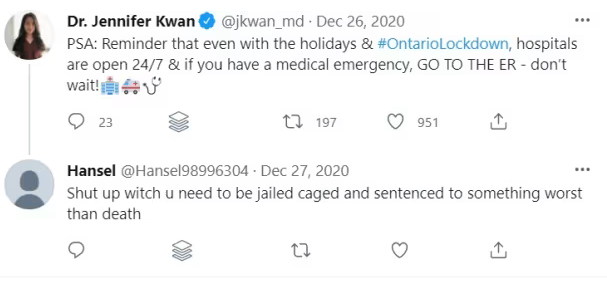


Extracted Text:
Dr. Jennifer Kwan @ @jkwan_md : Dec 26, 2020 oo
PSA: Reminder that even with the holidays & #OntarioLockdown, hospitals
are open 24/7 & if you have a medical emergency, GO TO THE ER - don't
wa dda

oO 2 g T 197 © 951 &
Hansel @Hansel98996304 - Dec 27, 2020 ad

Shut up witch u need to be jailed caged and sentenced to something worst
than death

° g a ° 4

Classified Sentiment: Negative


Upload an image (Y/N)? Y

Please upload an image file...


Saving Screenshot 2025-05-08 212528.png to Screenshot 2025-05-08 212528.png


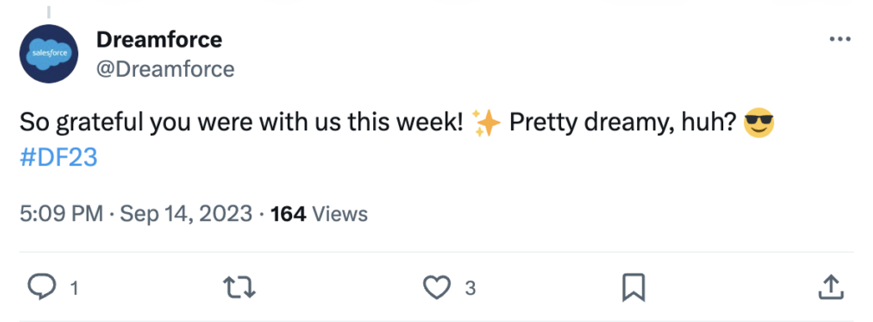


Extracted Text:
Dreamforce

@Dreamforce
So grateful you were with us this week! +» Pretty dreamy, huh? =¥
#DF23

5:09 PM - Sep 14, 2023 - 164 Views

01 nD O3 AN

a

Classified Sentiment: Positive


Upload an image (Y/N)? N

Program terminated. Goodbye!


In [ ]:
# Step 3: Function to Extract Text from Image
def extract_text(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Error loading image. Check the file path.")

        cv2_imshow(img)  # Display the image in Colab
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(gray)
        return text.strip()

    except Exception as e:
        print(f"Error extracting text: {e}")
        return None

# Step 4: Function to Classify Extracted Text
def classify_text_sentiment(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    sentiment = model.predict([text])[0]
    return sentiment

# Step 5: Image Upload Loop
def main():
    while True:
        choice = input("\nUpload an image (Y/N)? ").strip().lower()

        if choice == "n":
            print("\nProgram terminated. Goodbye!")
            break

        elif choice == "y":
            print("\nPlease upload an image file...")
            uploaded = files.upload()
            image_path = list(uploaded.keys())[0]

            text = extract_text(image_path)
            if text:
                print(f"\nExtracted Text:\n{text}")
                sentiment = classify_text_sentiment(text)
                print(f"\nClassified Sentiment: {sentiment}\n")
            else:
                print("\nNo text detected or error in processing.")

if __name__ == "__main__":
    main()



In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
import gradio as gr

def gradio_sentiment_from_image(img):
    try:
        # Convert uploaded image to OpenCV format and grayscale
        gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
        # OCR to extract text
        extracted_text = pytesseract.image_to_string(gray)

        if not extracted_text.strip():
            return "❌ No readable text found in the image."

        # Clean and predict sentiment
        cleaned_text = re.sub(r'[^\w\s]', '', extracted_text.lower())
        predicted_sentiment = model.predict([cleaned_text])[0]

        return f"📄 **Extracted Text**:\n{extracted_text.strip()}\n\n🔍 **Predicted Sentiment**: `{predicted_sentiment}`"

    except Exception as e:
        return f"⚠️ Error: {e}"


In [ ]:
gr_interface = gr.Interface(
    fn=gradio_sentiment_from_image,
    inputs=gr.Image(type="pil", label="Upload Text Image"),
    outputs="markdown",
    title="Image Text Sentiment Classifier",
    description="Upload an image containing text. The system will extract the text using OCR and classify the sentiment as Positive or Negative."
)

# Launch the interface (with shareable public link)
gr_interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ffc858ed16b0953c59.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
